<a href="https://colab.research.google.com/github/pathilink/bemol_data_case/blob/main/notebooks/bemol_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#ee3e33>Bemol</font><font color=#0096d7>'s Technical Case | Data Analyst II</font>

## Dictionary

| Column | Description |
|-|-|
| Material | Unique code for each product. |
| descricao material | Product name. |
| gm3 | Merchandise category code to which each product belongs. |
| descricao gm3 | Merchandise category name. |
| id loja | Code of the shop where the sale was made.|
| nome loja | Name of the shop where the sale was made. |
| Cidade loja | City of origin of the shop. |
| UF | State of origin of the shop. |
| preco custo | Cost price (excluding freight) of the product. |
| Frete | Percentage of the freight price that must be applied to the cost price to obtain the total cost price of the product. |
| preco venda | Selling price of the product. |
| qtd vendida | Number of units sold on a given date. |
| data venda | Day of sale. |


## Libraries

In [1]:
import pandas as pd
import numpy as np # list
import datetime
import seaborn as sns # graph
%matplotlib inline
from matplotlib import pyplot as plt # plot

from google.colab import drive


In [2]:

# pd.set_option('display.max_columns', None)
# pd.set_option("display.max_rows", None)

## Data

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# upload data
df = pd.read_csv("drive/MyDrive/test/bemol/data/base_vendas_desafio.csv")
df.head()

,Material,descricao material,gm3,descricao gm3,id loja,Nome loja,Cidade loja,UF,preco custo,Frete,preco venda,qtd vendida,data venda
0,199592,OMELETEIRA BRINOX CLOVE 7111/470 CB,127,UTILIDADE DOMÉSTICA,114,PONTA NEGRA,MANAUS,AM,34.04,NaN,72.0,1,2021-10-09
1,201754,AR COND 7500 CONSUL CCN07EBA 127V,117,LINHA BRANCA,106,SHOPPING,MANAUS,AM,1015.91,0.01,1242.0,1,2021-07-21
2,206768,GELADEIRA CONTINENTAL FF 472L TC56 BR,117,LINHA BRANCA,115,CIDADE NOVA,MANAUS,AM,1497.31,0.0,2944.0,1,2021-06-03
3,218944,CENTRO DE MESA RICAELLE MOGLIA PRATP069,127,UTILIDADE DOMÉSTICA,118,CAMAPUA,MANAUS,AM,152.29,0.0,339.0,1,2023-05-26
4,209714,VENT DE MESA ARNO USF 50 VD50 PT,111,ELETROPORTÁTEIS,105,EDUCANDOS,MANAUS,AM,163.40,NaN,389.0,1,2020-12-10


In [5]:
print('The dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataframe has 51000 rows and 13 columns.


In [6]:
# data information
df.info() #verbose=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material            51000 non-null  int64  
 1   descricao material  51000 non-null  object 
 2   gm3                 51000 non-null  int64  
 3   descricao gm3       51000 non-null  object 
 4   id loja             51000 non-null  int64  
 5   Nome loja           51000 non-null  object 
 6   Cidade loja         51000 non-null  object 
 7   UF                  51000 non-null  object 
 8   preco custo         51000 non-null  float64
 9   Frete               31775 non-null  object 
 10  preco venda         51000 non-null  float64
 11  qtd vendida         51000 non-null  int64  
 12  data venda          51000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


In [7]:
# list unique values per column
value_list = []
unique_list = []

for col in df:
  value_list.append(col)
  unique_list.append(df[col].unique())

# list(zip(col_list, unique_list))
df_unique = pd.DataFrame(
    {'column': value_list,
     'nunique': unique_list
     }
)

df_unique

,column,nunique
0,Material,"[199592, 201754, 206768, 218944, 209714, 21975..."
1,descricao material,"[OMELETEIRA BRINOX CLOVE 7111/470 CB, AR COND ..."
2,gm3,"[127, 117, 111, 126, 130, 105, 102, 120, 101, ..."
3,descricao gm3,"[UTILIDADE DOMÉSTICA, LINHA BRANCA, ELETROPORT..."
4,id loja,"[114, 106, 115, 118, 105, 117, 121, 120, 102, ..."
5,Nome loja,"[PONTA NEGRA, SHOPPING, CIDADE NOVA, CAMAPUA, ..."
6,Cidade loja,"[MANAUS, PORTO VELHO, BOA VISTA, COARI, JI-PAR..."
7,UF,"[AM, RO, RR, amazonas, AC]"
8,preco custo,"[34.04, 1015.91, 1497.31, 152.29, 163.4, 947.6..."
9,Frete,"[nan, 0.01, 0.0, 0.0%, 0.18, 0.02, 0.15, 0.08,..."


## Data preparation

In [8]:
# copy df
df_prep = df.copy()

In [9]:
# rename columns

df_prep.rename(columns={
    'Material': 'material',
    'descricao material': 'descricao_material',
    # 'gm3': 'gm3',
    'descricao gm3': 'descricao_gm3',
    'id loja': 'id_loja',
    'Nome loja': 'nome_loja',
    'Cidade loja': 'cidade_loja',
    'UF': 'uf',
    'preco custo': 'preco_custo',
    'Frete': 'frete',
    'preco venda': 'preco_venda',
    'qtd vendida': 'qtd_vendida',
    'data venda': 'data_venda'
    }, inplace=True)

In [10]:
# transform object into datetime - format 'yyy-mm-dd'
df_prep['data_venda'] = pd.to_datetime(df_prep['data_venda'], format='%Y-%m-%d')

# check type
print(df_prep['data_venda'].dtypes)

datetime64[ns]


In [11]:
# replace 'amazonas' --> 'AM'
df_prep['uf'] = df_prep['uf'].replace('amazonas', 'AM')

# check
df_prep['uf'].unique()

array(['AM', 'RO', 'RR', 'AC'], dtype=object)

In [12]:
# replace NaN, % and alter data type
df_prep['frete'] = df_prep['frete'].fillna('0.0').str.replace('%', '').astype(float)

# check
df_prep['frete'].unique()

array([0.  , 0.01, 0.18, 0.02, 0.15, 0.08, 0.21, 0.13, 0.07, 0.22, 0.23,
       0.28, 0.03, 0.11, 0.04, 0.06, 0.27, 0.1 , 0.14, 0.16, 0.09, 0.19,
       0.05, 0.25, 0.17, 0.12, 0.2 , 0.24, 0.3 , 0.31, 0.38, 0.29, 0.26,
       0.73, 0.35, 0.32])

In [13]:
# alter column type
df_prep['material'] = df_prep['material'].astype(str)

# check
print(df_prep['material'].dtypes)

object


In [14]:
# alter column type
df_prep['gm3'] = df_prep['gm3'].astype(str)

# check
print(df_prep['gm3'].dtypes)

object


In [15]:
# alter column type
df_prep['id_loja'] = df_prep['id_loja'].astype(str)

# check
print(df_prep['id_loja'].dtypes)

object


In [16]:
df_prep.sample(5)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda
41522,215408,CAIXA DE BRINCADEIRA ELKA ATIVIDADE 1135,105,BRINQUEDOS,109,GRANDE CIRCULAR,MANAUS,AM,38.04,0.08,92.0,1,2023-09-30
47335,187535,FERRO MONDIAL VAPOR F-40 BR/RX,111,ELETROPORTÁTEIS,119,MANAUARA,MANAUS,AM,92.90,0.08,198.0,1,2023-03-26
11889,200296,"POTE INVICTA 1,3L QUAD 101528511725 CO",127,UTILIDADE DOMÉSTICA,119,MANAUARA,MANAUS,AM,4.10,0.00,12.0,3,2020-11-12
2245,201687,JG COPAG CARTAS UNO 98190,105,BRINQUEDOS,109,GRANDE CIRCULAR,MANAUS,AM,9.24,0.00,19.0,1,2021-04-01
14941,226209,BOMBA ELÉTRICA MIMO 8543-SF22394 BR/PT,127,UTILIDADE DOMÉSTICA,116,STUDIO5,MANAUS,AM,14.72,0.06,34.0,1,2023-04-21


## Exploratory Data Analysis

### Date variable

In [17]:
# range of data

print("Minimum date:", df_prep.data_venda.min())
print("Maximum date:", df_prep.data_venda.max())

Minimum date: 2020-05-01 00:00:00
Maximum date: 2024-04-30 00:00:00


In [18]:
# create column
df_prep['day_of_week'] = df_prep['data_venda'].dt.strftime('%a')


In [19]:
df_prep.groupby('day_of_week')['data_venda'].count().reset_index()

,day_of_week,data_venda
0,Fri,7647
1,Mon,7404
2,Sat,9232
3,Sun,4177
4,Thu,7551
5,Tue,7523
6,Wed,7466


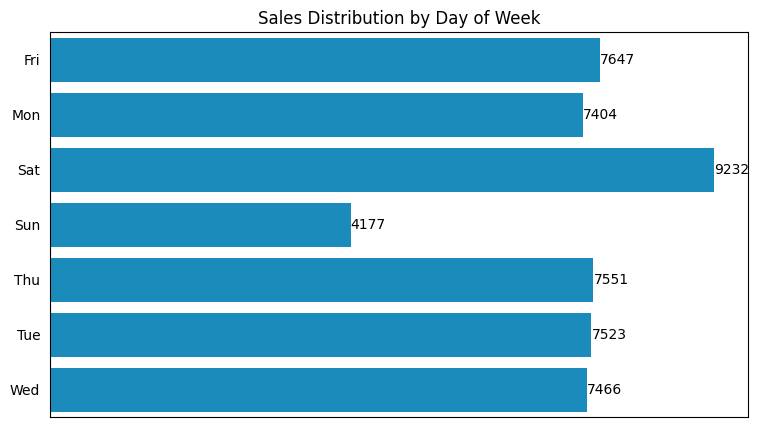

In [20]:
plt.figure(figsize=(9, 5))
ax=sns.barplot(y='day_of_week', x='data_venda', data=df_prep.groupby('day_of_week')['data_venda'].count().reset_index(), color='#0096d7')
plt.title('Sales Distribution by Day of Week')
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

### Quantitative variables

In [21]:
df_prep[['preco_custo', 'frete', 'preco_venda', 'qtd_vendida']].describe()

,preco_custo,frete,preco_venda,qtd_vendida
count,51000.000000,51000.000000,51000.000000,51000.000000
mean,390.560699,0.014607,2195.023916,1.060902
std,608.764358,0.043604,17769.030829,0.519372
min,0.930000,0.000000,5.000000,0.000000
25%,31.185000,0.000000,69.000000,1.000000
50%,100.500000,0.000000,219.000000,1.000000
75%,575.290000,0.000000,1149.000000,1.000000
max,20459.960000,0.730000,839900.000000,50.000000


**preco_custo:**

In [22]:
df_prep.query('preco_custo <= 10000').sort_values(by='preco_custo').tail(10)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,day_of_week
10305,217865,SMARTPHONE APPLE IPHONE 13PROMAX 128GBAZ,126,TELEFONIA,701,BOA VISTA,BOA VISTA,RR,7185.71,0.00,10499.0,1,2022-02-19,Sat
82,217234,SMARTPHONE APPLE IPHONE 13PROMAX 128GBGF,126,TELEFONIA,115,CIDADE NOVA,MANAUS,AM,7354.54,0.00,9999.0,1,2022-08-22,Mon
19535,210451,SMART APPLE IPHONE 12 PRO MAX 128GB GF,126,TELEFONIA,102,ONLINE,MANAUS,AM,7486.19,0.00,9999.0,1,2021-07-02,Fri
15276,228112,SMARTPHONE APPLE IPHONE 14PRO MAX 256 DO,126,TELEFONIA,570,MANAQUIRI,MANAQUIRI,AM,7524.73,0.00,11499.0,1,2023-04-12,Wed
16041,226514,SMARTPHONE APPLE IPHONE 14PROMAX 128G DO,126,TELEFONIA,115,CIDADE NOVA,MANAUS,AM,7574.64,0.06,10499.0,1,2023-09-05,Tue
10127,234248,SMARTPHONE APPLE IPHONE 15PRO MAX 256 PT,126,TELEFONIA,401,RIO BRANCO,RIO BRANCO,AC,7868.42,0.00,10999.0,1,2024-04-30,Tue
24514,210843,SMART APPLE IPHONE 12PRO 256GB DO AAT IM,126,TELEFONIA,101,MATRIZ,MANAUS,AM,8005.23,0.00,9839.0,1,2021-04-29,Thu
14690,234248,SMARTPHONE APPLE IPHONE 15PRO MAX 256 PT,126,TELEFONIA,106,SHOPPING,MANAUS,AM,8029.27,0.00,10999.0,1,2024-02-11,Sun
13815,210458,SMART APPLE IPHONE 12 PRO MAX 256GB AZ,126,TELEFONIA,106,SHOPPING,MANAUS,AM,8820.16,0.00,11999.0,1,2021-09-21,Tue
5629,206381,TV 82 LG LED UHD 82UN8000PSB,130,VÍDEO,120,PONTA NEGRA SHOPPING,MANAUS,AM,9299.05,0.01,14549.0,1,2021-06-05,Sat


In [23]:
df_prep.query('preco_custo >= 10000')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,day_of_week
1075,206811,TV 86 LG LED UHD SMART NANO 86NANO90SNA,130,VÍDEO,120,PONTA NEGRA SHOPPING,MANAUS,AM,20459.96,0.00,34429.0,1,2020-11-20,Fri
26700,214119,TV 86 LG SMART UHD NANOCELL 86NANO75,130,VÍDEO,500,TORQUATO,MANAUS,AM,13639.35,0.01,22898.0,1,2021-11-13,Sat


In [24]:
df_prep.query('preco_custo >= 20000')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,day_of_week
1075,206811,TV 86 LG LED UHD SMART NANO 86NANO90SNA,130,VÍDEO,120,PONTA NEGRA SHOPPING,MANAUS,AM,20459.96,0.0,34429.0,1,2020-11-20,Fri


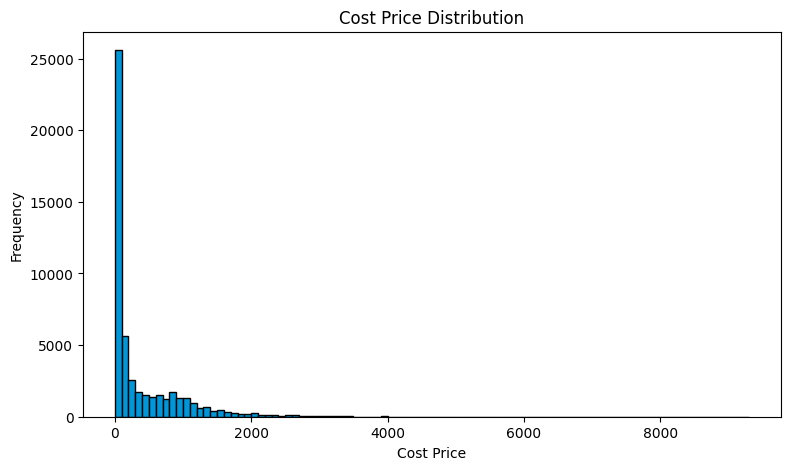

In [25]:
preco_custo_filtered = df_prep.query('preco_custo <= 10000')

plt.figure(figsize=(9, 5))

# Calculate bins limits every 100
bins = np.arange(preco_custo_filtered['preco_custo'].min(), preco_custo_filtered['preco_custo'].max() + 100, 100)

# Histogram
ax = plt.hist(preco_custo_filtered['preco_custo'], bins=bins, edgecolor='black', color='#0096d7')

# Labels
for rect in ax[2]:  # ax[2] contains the patches (bars) in the histogram
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    # plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points',
                #  ha='center', va='bottom', fontsize=8)

plt.xlabel('Cost Price')
plt.ylabel('Frequency')
plt.title('Cost Price Distribution')

plt.show()

# Mode: products cost <= R$100

**frete:**

In [26]:
df_prep.query('frete >= 0.73')

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,day_of_week
2832,212841,CAPA ELECTROLUX P/LAVADORAS 10 A 16KG BR,127,UTILIDADE DOMÉSTICA,117,MILLENNIUM,MANAUS,AM,28.53,0.73,66.0,2,2023-12-15,Fri
20219,220981,KIT POTE ELECTROLUX HERM C/T A23122901,127,UTILIDADE DOMÉSTICA,102,ONLINE,MANAUS,AM,70.66,0.73,164.0,1,2024-01-09,Tue
23494,182963,KIT SACO ELECTROLUX P/ASPIRAD SBEON,111,ELETROPORTÁTEIS,102,ONLINE,MANAUS,AM,8.31,0.73,32.0,1,2024-02-14,Wed
26705,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,202,PORTO VELHO SHOPPING,PORTO VELHO,RO,10.08,0.73,24.0,1,2023-12-12,Tue
30036,212832,MARMITA ELECTROLUX LUN BOX A15338601 PT,127,UTILIDADE DOMÉSTICA,102,ONLINE,MANAUS,AM,14.64,0.73,36.0,1,2023-12-07,Thu
36217,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,116,STUDIO5,MANAUS,AM,10.08,0.73,24.0,1,2023-12-05,Tue
40415,220981,KIT POTE ELECTROLUX HERM C/T A23122901,127,UTILIDADE DOMÉSTICA,115,CIDADE NOVA,MANAUS,AM,70.66,0.73,164.0,1,2024-01-10,Wed
46941,93475,KIT SACO ELECTROLUX P/ASPIRAD A10 CSE10,111,ELETROPORTÁTEIS,204,JATUARANA,PORTO VELHO,RO,10.08,0.73,38.0,1,2024-01-13,Sat


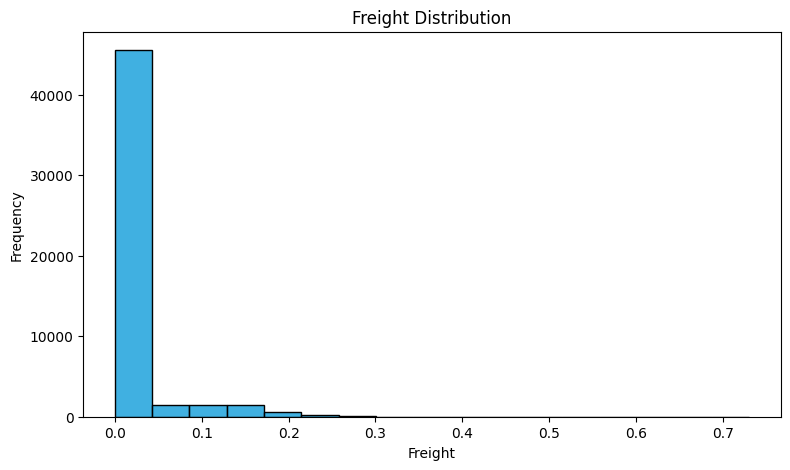

In [27]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df_prep, x='frete', color='#0096d7')

plt.xlabel('Freight')
plt.ylabel('Frequency')
plt.title('Freight Distribution')

plt.show()

**preco_venda:**

In [28]:
df_prep.query('preco_venda >= 10000').sort_values(by='preco_venda').tail(10)

,material,descricao_material,gm3,descricao_gm3,id_loja,nome_loja,cidade_loja,uf,preco_custo,frete,preco_venda,qtd_vendida,data_venda,day_of_week
9542,199321,GELADEIRA ELECTROLUX FF 431L TF55S IN,117,LINHA BRANCA,115,CIDADE NOVA,MANAUS,AM,2477.04,0.00,476900.0,1,2022-08-15,Mon
34195,222024,TV 65 LG 4K UHD SMART 65UQ8050,130,VÍDEO,109,GRANDE CIRCULAR,MANAUS,AM,3037.37,0.01,489600.0,1,2022-11-07,Mon
28643,210349,SMART APPLE IPHONE 11 64GB VM (AAT) NAC,126,TELEFONIA,109,GRANDE CIRCULAR,MANAUS,AM,3493.18,0.00,527800.0,1,2022-01-18,Tue
25289,190176,GELADEIRA ELECTROLUX FF DM84X 579L IN,117,LINHA BRANCA,201,PORTO VELHO,PORTO VELHO,RO,2843.96,0.00,558900.0,1,2020-07-25,Sat
20228,193038,PROJETOR EPSON POWERLITE U42+,114,INFORMÁTICA,202,PORTO VELHO SHOPPING,PORTO VELHO,RO,3269.46,0.00,599900.0,1,2021-09-14,Tue
23780,216906,SMARTPHONE APPLE IPHONE 12 64GB VD,126,TELEFONIA,109,GRANDE CIRCULAR,MANAUS,AM,4603.62,0.00,629900.0,1,2022-06-11,Sat
32111,231785,GELADEIRA CONSUL FF 451L CRM56FK IN,117,LINHA BRANCA,520,MANACAPURU,MANACAPURU,AM,2878.82,0.15,643900.0,1,2024-04-06,Sat
17311,202005,TV 75 LG UHD SMART WEBOS 75UM7510PSB,130,VÍDEO,115,CIDADE NOVA,MANAUS,AM,4296.59,0.01,652400.0,1,2020-07-15,Wed
35662,222133,GELADEIRA ELECTROLUX INV MULTI 581L IQ8S,117,LINHA BRANCA,119,MANAUARA,MANAUS,AM,4197.48,0.13,803400.0,1,2023-05-30,Tue
25747,207029,SMART APPLE IPHONE 11 PRO MAX 256 CZ IMP,126,TELEFONIA,101,MATRIZ,MANAUS,AM,5876.00,0.00,839900.0,1,2020-12-08,Tue


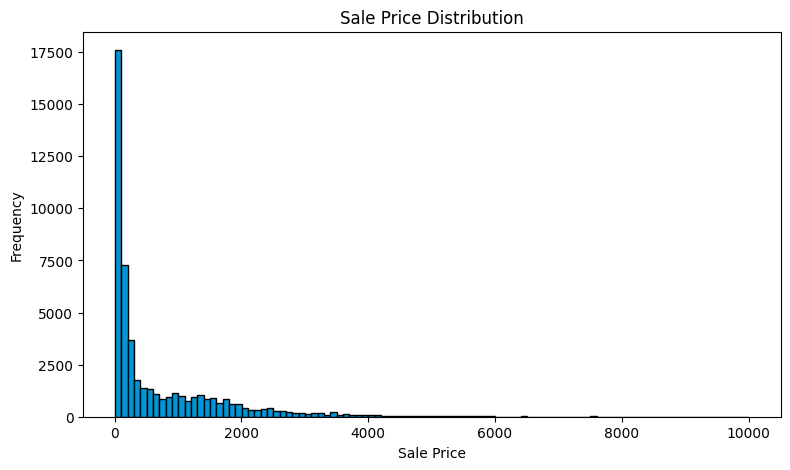

In [29]:
preco_venda_filtered = df_prep.query('preco_venda <= 10000')

plt.figure(figsize=(9, 5))

# Calculate bins limits every 100
bins = np.arange(preco_venda_filtered['preco_venda'].min(), preco_venda_filtered['preco_venda'].max() + 100, 100)

# Histogram
ax = plt.hist(preco_venda_filtered['preco_venda'], bins=bins, edgecolor='black', color='#0096d7')

# Labels
for rect in ax[2]:  # ax[2] contains the patches (bars) in the histogram
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    # plt.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points',
                #  ha='center', va='bottom', fontsize=8)

plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

plt.show()

# Mode: products sale <= R$100

In [30]:
# create column & calculate difference
df_prep['custo_venda_diff'] = df_prep['preco_venda'] - df_prep['preco_custo']


In [31]:
# negative?
df_prep[['preco_custo', 'preco_venda', 'custo_venda_diff']].query('custo_venda_diff < 0').sample(5)

,preco_custo,preco_venda,custo_venda_diff
43431,128.18,99.0,-29.18
9967,30.00,29.0,-1.00
25502,487.39,399.0,-88.39
35700,30.00,29.0,-1.00
38200,2123.66,2104.0,-19.66


In [32]:
# top 20 positive difference
positive_diff = df_prep[['descricao_gm3', 'preco_custo', 'preco_venda', 'custo_venda_diff']].sort_values(by='custo_venda_diff').tail(20)

In [33]:
# top 20 negative difference
negative_diff = df_prep[['descricao_gm3', 'preco_custo', 'preco_venda', 'custo_venda_diff']].sort_values(by='custo_venda_diff').head(20)

In [34]:
# combine
combined_diff = pd.concat([negative_diff, positive_diff]).reset_index(drop=True)
combined_diff.sample(5)

,descricao_gm3,preco_custo,preco_venda,custo_venda_diff
2,UTILIDADE DOMÉSTICA,154.71,19.0,-135.71
14,LINHA BRANCA,2123.66,2104.0,-19.66
23,INFORMÁTICA,2363.94,409900.0,407536.06
0,UTILIDADE DOMÉSTICA,180.49,33.0,-147.49
33,LINHA BRANCA,2843.96,558900.0,556056.04


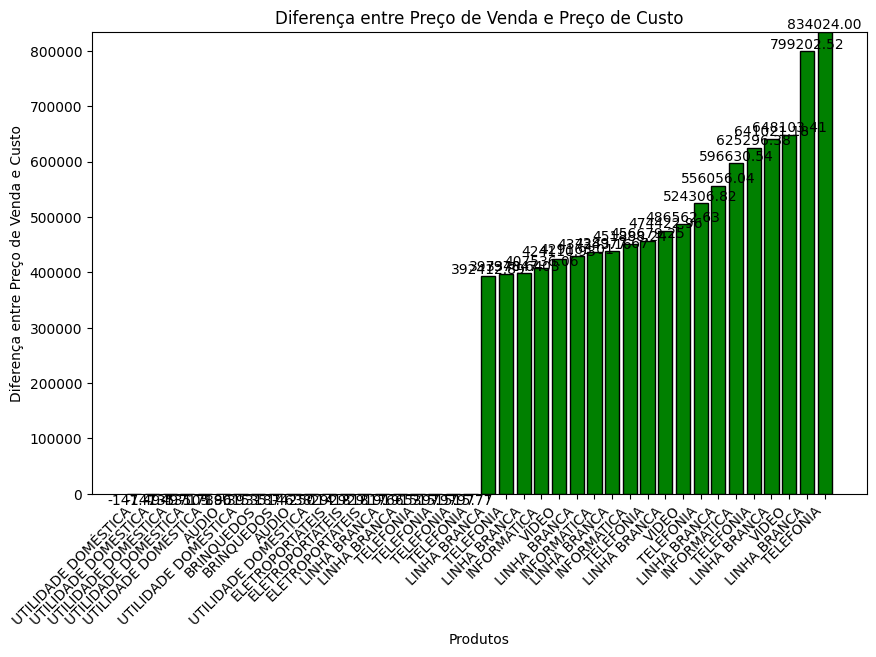

In [35]:
# Cores diferentes para positivos e negativos
colors = ['red' if x < 0 else 'green' for x in combined_diff['custo_venda_diff']]

plt.figure(figsize=(10, 6))

# Ajustar limites do eixo y para incluir valores negativos
y_min = combined_diff['custo_venda_diff'].min() - 100  # Adicionar um pouco de margem
y_max = combined_diff['custo_venda_diff'].max() + 100  # Adicionar um pouco de margem

plt.ylim(y_min, y_max)

# Plotar gráfico de barras com cores diferentes
bars = plt.bar(combined_diff.index, combined_diff['custo_venda_diff'], color=colors, edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Produtos')
plt.ylabel('Diferença entre Preço de Venda e Custo')
plt.title('Diferença entre Preço de Venda e Preço de Custo')

# Adicionar anotações nas barras
for i, v in enumerate(combined_diff['custo_venda_diff']):
    plt.text(i, v + (10 if v > 0 else -10), f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top', color='black')

# Adicionar rótulos nos eixos
plt.xticks(combined_diff.index, combined_diff['descricao_gm3'], rotation=45, ha='right')

plt.show()


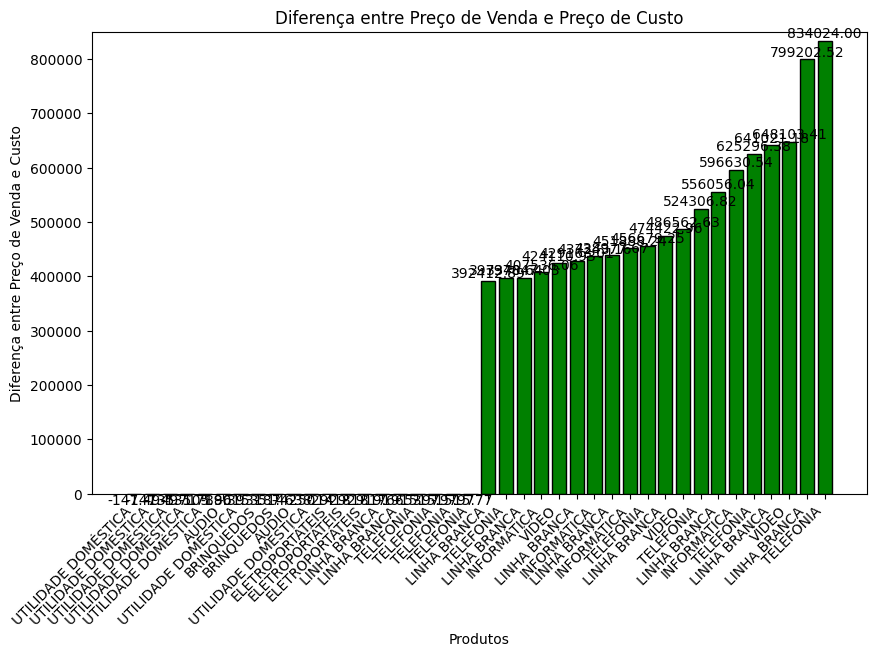

In [36]:
# Cores diferentes para positivos e negativos
colors = ['red' if x < 0 else 'green' for x in combined_diff['custo_venda_diff']]

plt.figure(figsize=(10, 6))

# plt.ylim(min(combined_diff['custo_venda_diff']), max(combined_diff['custo_venda_diff']))
plt.ylim(-150, 850000)

# Plotar gráfico de barras com cores diferentes
plt.bar(combined_diff.index, combined_diff['custo_venda_diff'], color=colors, edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Produtos')
plt.ylabel('Diferença entre Preço de Venda e Custo')
plt.title('Diferença entre Preço de Venda e Preço de Custo')

# Ajustar limites do eixo y para incluir valores negativos
# plt.ylim(combined_diff['custo_venda_diff'].min() - 10000, combined_diff['custo_venda_diff'].max() + 10000)

# Adicionar anotações nas barras
for i, v in enumerate(combined_diff['custo_venda_diff']):
    plt.text(i, v + (1 if v > 0 else -1), f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top', color='black')

# Adicionar rótulos nos eixos
plt.xticks(combined_diff.index, combined_diff['descricao_gm3'], rotation=45, ha='right')

plt.show()



**qtd_vendida:**

### Qualitative variables

In [37]:
loja_qtd_vendida = df_prep.groupby('nome_loja')['qtd_vendida'].sum().reset_index()
top10 = loja_qtd_vendida.sort_values(by='qtd_vendida', ascending=False).head(10)
top10

,nome_loja,qtd_vendida
62,ONLINE,7945
11,CIDADE NOVA,3517
9,CAMAPUA,3404
72,SHOPPING,3359
51,GRANDE CIRCULAR,3282
58,MANAUARA,3007
64,PONTA NEGRA,2888
3,AVENIDA,2603
61,NOVA CIDADE,2521
75,TORQUATO,2435


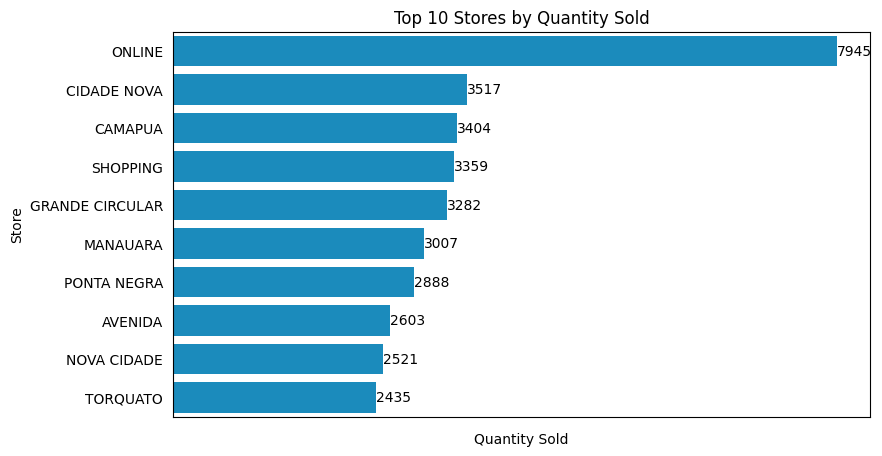

In [38]:
plt.figure(figsize=(9, 5))
ax=sns.barplot(y='nome_loja', x='qtd_vendida', data=top10, color='#0096d7')
plt.ylabel('Store')
plt.xlabel('Quantity Sold')
plt.title('Top 10 Stores by Quantity Sold')
ax.bar_label(ax.containers[0])
ax.set(xticklabels=[])
# ax.set(ylabel=None)
# ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

## Dictionary

| Column | Description | Type |
|-|-|-|
| Material | Unique code for each product. ||
| descricao material | Product name. ||
| gm3 | Merchandise category code to which each product belongs. ||
| descricao gm3 | Merchandise category name. ||
| id loja | Code of the shop where the sale was made.||
| nome loja | Name of the shop where the sale was made. ||
| Cidade loja | City of origin of the shop. ||
| UF | State of origin of the shop. ||
| preco custo | Cost price (excluding freight) of the product. ||
| Frete | Percentage of the freight price that must be applied to the cost price to obtain the total cost price of the product. ||
| preco venda | Selling price of the product. ||
| qtd vendida | Number of units sold on a given date. ||
| data venda | Day of sale. ||

## Download data

In [39]:
# df_prep.to_csv('/content/drive/My Drive/test/bemol/data/new_base.csv', index=False)